# Bootstrap
## Reamostragem

Criar intervalo de confiança para a *distribuição amostral* (desconhecida)

In [2]:
from scipy import stats
import seaborn as sns
import pandas as pd
from scipy.stats import norm
import numpy as np
import statistics

In [54]:
print(stats.binom.rvs(n=1,p=.5,size=8))

[0 0 0 0 0 0 0 0]


In [58]:
data = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
data.head(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


# Análise exploratória

In [61]:
data["am"].value_counts()

am
0    19
1    13
Name: count, dtype: int64

Temos 19 carros automáticos e 13 carros manuais nos dados

In [60]:
data.groupby("am")["mpg"].mean()

am
0    17.147368
1    24.392308
Name: mpg, dtype: float64

A média de eficiência energética para este conjunto de dados é maior para os carros manuais que para carros automáticos

In [64]:
data.groupby("am")["mpg"].mean()[0] / data.groupby("am")["mpg"].mean()[1]

0.7029826221182095

A diferença pontual é de 70,3% 

<Axes: xlabel='am', ylabel='mpg'>

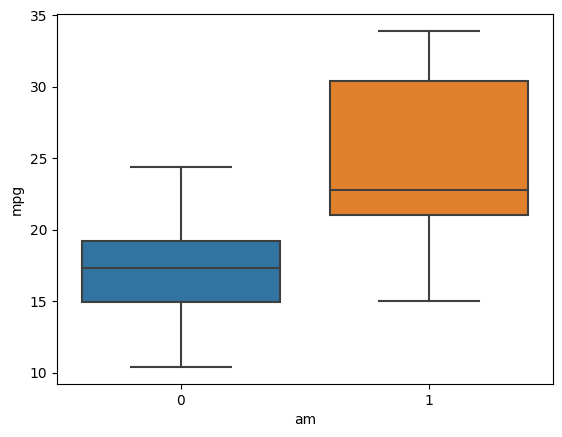

In [66]:
sns.boxplot(y=data["mpg"],
            x=data["am"])

À rigor, devemos testar se as médias diferem, assumindo que esta amostra é boa

In [67]:
stats.shapiro(data.mpg)

ShapiroResult(statistic=0.9475648403167725, pvalue=0.1228824257850647)

Como o teste de Shapiro-Wilk não rejeita a normalidade da variável de interesse *mpg*, podemos fazer testes paramétricos 

$H_0$: Carros manuais e automáticos tem mesma eficiência \
$H_1$: Carros manuais são mais eficientes

Ou; \
$H_0: \mu_M = \mu_A$ \
$H_1: \mu_M > \mu_A$

In [73]:
data.mpg

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [182]:
from random import sample

In [197]:
x=np.arange(start=0, stop=32, step=1)
x = np.array(x)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [222]:
mpg = np.array(data.mpg)

In [239]:
i = sample(sorted(x),19)
mpg[i]
a = set(i)
total = set(x)
total.difference(a)

{2, 3, 5, 6, 8, 12, 14, 15, 16, 17, 20, 22, 27}

In [241]:
range(32)

range(0, 32)